# <font color='green'> NYC TAXI TRIP - EDA </font> 

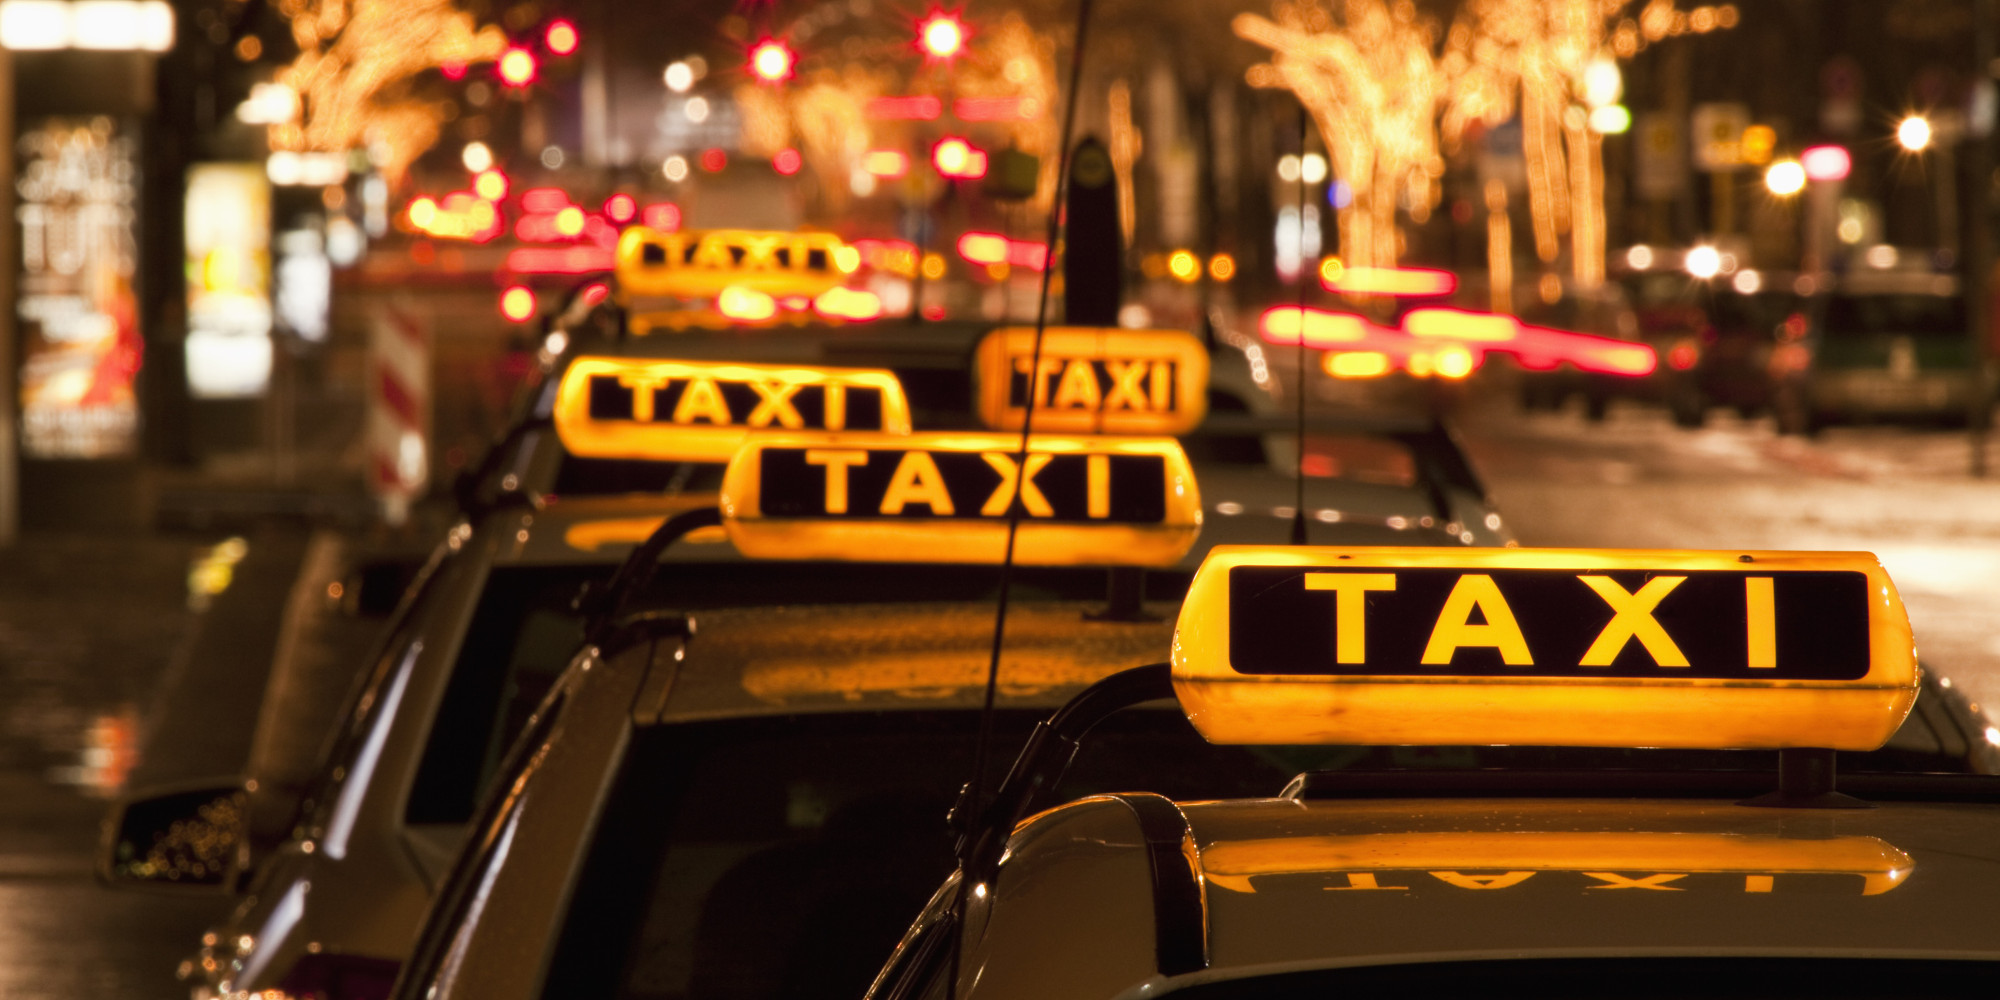

### <font color='brown'>Problem Statement:</font>

The NYC Taxi company wants us to predict the duration of each trip at the point when the trip starts.


### <font color='brown'>Hypothesis Generation</font>
- Start datetime: Weekends tend to have lesser trip duration due to less congestion.
- Pickup and Drop Location : Distance between these locations.
- Weather
- Traffic

### <font color = 'brown'>Data Extraction:</font>
We collect data from different systems, like:
- Trip
- Traffic and Geographic Information
- Weather

The data points are:
- id
- vendor_id
- pickup_datetime
- dropoff_datetime
- passengers_count
- pickup_longitude
- pickup_latitude
- dropoff_longitude
- dropoff_latitude
- store_and_fwd_flag
- trip_duration


### <font color='brown'>Exploratory Data Analysis</font>

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# importing data
df = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
# first 5 instances of data
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
# printing the columns present in the data
print(f'Columns: {df.columns}')

Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [5]:
# data types of the variables
print(f'dtypes: {df.dtypes}')

dtypes: id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


In [6]:
# checking for int64 datatypes
print(f'int64: {df.dtypes[df.dtypes =="int64"]}')

int64: vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object


In [7]:
# checking for float64 datatypes
print(f'float64: {df.dtypes[df.dtypes == "float64"]}')

float64: pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object


In [8]:
# checking for object datatypes
print(f'objects: {df.dtypes[df.dtypes == "object"]}')

objects: id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object


In [9]:
# Type casting to category 
df['vendor_id'] = df['vendor_id'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

In [10]:
# checking the conversion
df.dtypes

id                      object
vendor_id             category
pickup_datetime         object
dropoff_datetime        object
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
dtype: object

In [11]:
# Type Casting to datetime

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [12]:
df.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

In [13]:
# Computing a new column distance using latitude and longitude of pickup and drop

from math import sin, cos, sqrt, atan2, radians
distance_converted = []
def distance_converter(df):
    # number of rows
    n = df.shape[0]
    # approximate radius of earth in km
    R = 6373.0
    for i in range(n):
        lat1 = radians(df['pickup_latitude'][i])
        lat2 = radians(df['dropoff_latitude'][i])
        long1 = radians(df['pickup_longitude'][i])
        long2 = radians(df['dropoff_longitude'][i])
        # calculating the distance
        dlon = long2 - long1
        dlat = lat2 - lat1
        a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = R * c
        # since trip duration is in seconds converting it to miles
        miles = 0.621371 * distance
        distance_converted.append(round(miles,2))
    return distance_converted
    

In [14]:
df['distance'] = pd.Series(distance_converter(df))
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0.75
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,2.57
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,4.51
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1.47
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2.69


In [15]:
# pickup datetime
pick_date = pd.DatetimeIndex(df['pickup_datetime'])
df['pickup_day_of_week'] = pick_date.dayofweek
df['pickup_month_of_year'] = pick_date.month
df['pickup_date_mnth'] = pick_date.day
df['pickup_hours'] = pick_date.hour
df['pickup_min'] = pick_date.minute
df['pickup_sec'] = pick_date.second

import datetime
datetime.date.today().strftime('%A')

In [16]:
# pickup datetime
drop_date = pd.DatetimeIndex(df['pickup_datetime'])
df['dropoff_day_of_week'] = drop_date.dayofweek
df['dropoff_month_of_year'] = drop_date.month
df['dropoff_date_mnth'] = drop_date.day
df['dropoff_hours'] = drop_date.hour
df['dropoff_min'] = drop_date.minute
df['dropoff_sec'] = drop_date.second

In [17]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_date_mnth,pickup_hours,pickup_min,pickup_sec,dropoff_day_of_week,dropoff_month_of_year,dropoff_date_mnth,dropoff_hours,dropoff_min,dropoff_sec
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,29,16,40,21,0,2,29,16,40,21
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,11,23,35,37,4,3,11,23,35,37
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,21,17,59,33,6,2,21,17,59,33
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,5,9,44,31,1,1,5,9,44,31
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,17,6,42,23,2,2,17,6,42,23
